In [1]:
import scipy as sp
import sklearn
%pylab inline

Populating the interactive namespace from numpy and matplotlib


[[ 0.  1.]
 [-1.  0.]]
[    1.  1000.]
(1000,)
(1000, 2)


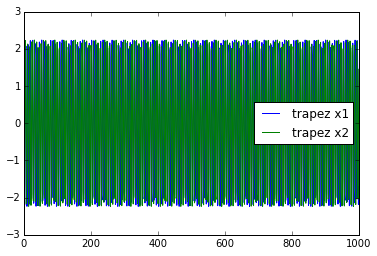

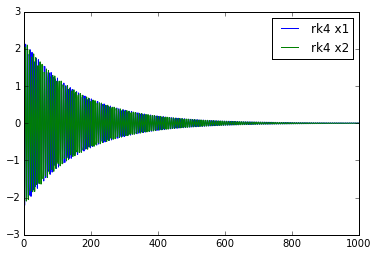

In [26]:
trapez = sp.loadtxt("trapez.data", delimiter=',')
#print(trapez)
rk4=sp.loadtxt("rk4.data",delimiter=',')
#print(rk4)
nesto=sp.loadtxt("parametri.txt")
A=sp.loadtxt("A2.txt")
B=sp.loadtxt("B1.txt")
x0=sp.loadtxt("x01.txt")
print(A)
print(nesto)
period=nesto[0]
tmax=nesto[1]
n=trapez.shape[0]
ts=sp.linspace(0,tmax,n)
print(ts.shape)
print(trapez.shape)
plot(ts,trapez[:,0],label='trapez x1')
plot(ts,trapez[:,1],label='trapez x2')
plt.legend(loc='best')
plt.show()
plot(ts,rk4[:,0],label='rk4 x1')
plot(ts,rk4[:,1],label='rk4 x2')
plt.legend(loc='best')
plt.show()


In [27]:
class Trapez:
    def __init__(self,A,B,period):
        eye=np.eye(A.shape[0])
        at2=A*(period/2)
        prva=inv(eye-at2)
        druga=eye+at2
        self.R=sp.dot(prva,druga)
        self.S=sp.dot(prva,B*(period/2))
    def getNext(self,xk):
        return sp.dot(self.R,xk)+self.S
    
class RK4:
    def __init__(self,A,B,period):
        self.A=A
        self.B=B
        self.period=period
    def getNext(self,xk):
        m1=sp.dot(self.A,xk)+self.B
        m2=sp.dot(self.A,m1*period*0.5+xk)+self.B
        m3=sp.dot(self.A,m2*period*0.5+xk)+self.B
        m4=sp.dot(self.A,m3*period+xk)+self.B
        return xk+(m1+2*m2+2*m3+m4)*(period/6)
    
def postupak(period,x0,tmax,getNextFja):
    n=int(floor(tmax/period))-1
    res=[x0]
    xk=x0
    for i in range(0,n):
        xk1=getNextFja(xk)
        xk=xk1
        res.append(xk1)
    return np.array(res)    

In [81]:


A=sp.loadtxt("A2.txt")
B=sp.loadtxt("B1.txt")
x0=sp.loadtxt("x01.txt")


In [99]:
#nesto=sp.loadtxt("parametri.txt")
#period=nesto[0]
#tmax=nesto[1]
period=0.1
tmax=100
n=int(tmax/period)
print(n)
ts=sp.linspace(0,tmax,n)

1000


period 0.1
[[ 0.  1.]
 [-1.  0.]]
(1000, 2)


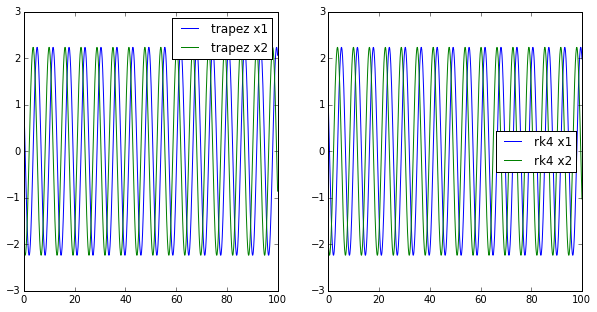

In [100]:
tr=Trapez(A,B,period)
rk=RK4(A,B,period)
tr.R
tr.S
nes=postupak(period,x0,tmax,tr.getNext)
drugo=postupak(period,x0,tmax,rk.getNext)
print("period",rk.period)
print(A)
#print(nes)
#print(drugo)
#print(ts.shape)
print(nes.shape)
fig=plt.figure(figsize=(10,5))
fig.add_subplot("121")
plt.plot(ts,nes[:,0],label='trapez x1')
plt.plot(ts,nes[:,1],label='trapez x2')
plt.legend()
fig.add_subplot("122")
plt.plot(ts,drugo[:,0],label='rk4 x1')
plt.plot(ts,drugo[:,1],label='rk4 x2')
plt.legend(loc='best')
plt.show()